In [1]:
# 텐서플로가 제공하는 것들
# 1. GPU 지원
# 2. 분산 컴퓨팅
# 3. JIT 컴파일러를 초함하여 계산을 최적화한다.
# 4. 플랫폼에 중립적인 포맷으로 내보낼 수 있다.
# 5. 자동미분 기능과 고성능 옵티마이저를 제공 => 손실함수를 쉽게 최소화
import tensorflow as tf

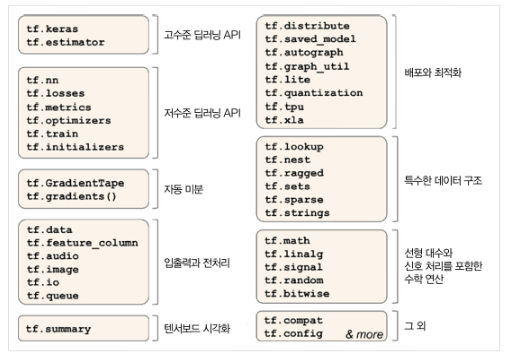

## 넘파이처럼 텐서플로 사용하기

### 텐서와 연산

In [2]:
tf.constant([[1.,2.,3.], [4.,5.,6.]])
# 행렬

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
tf.constant(42)
# 스칼라

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [4]:
t = tf.constant([[1.,2.,3.], [4.,5.,6.]])
print(t.shape)
print(t.dtype)

(2, 3)
<dtype: 'float32'>


In [5]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [6]:
t[..., 1]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 5.], dtype=float32)>

In [7]:
t[... , 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [8]:
t +10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [9]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [10]:
t @ tf.transpose(t)
# @ => numpy 배열의 행렬곱을 하기 위해 사용

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### 텐서와 넘파이

In [11]:
import numpy as np
a = np.array([2.,4.,5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [12]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [13]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [14]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

In [15]:
# 넘파이 배열에 텐서플로 연산을 적용 할 수 있고, 텐서에 넘파이 연산을 적용할 수 도 있다.

# 넘파이는 기본적으로 64비트 정밀도를 사용하지만, 텐서플로는 32비트 정밀도를 사용한다.
# 일반적으로 신경망은 32비트 정밀도로 충분하고 더 빠르며, 메모리도 적게 사용하기 때문이다.
# 넘파이 배열을 텐서로 만들 때, dtype=tf.float32 로 지정해야 한다.

### 타입 변환

In [16]:
# 타입변환은 성능을 크게 감소시킬 수 있으며, 자동으로 타입이 변환될 시, 사용자가 눈치채지 못할 수 있음.
# 텐서플로는 이를 방지하기 위해 어떤 타입 변환도 자동으로 수행하지 않는다.
## => 예외 발생

tf.constant(2.)+tf.constant(40)
# 실수, 정수 덧셈 불가

InvalidArgumentError: ignored

In [18]:
tf.constant(2.) + tf.constant(40. , dtype=tf.float64)
# 32비트 실수, 64비트 실수 덧셈 불가

InvalidArgumentError: ignored

In [19]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0)+ tf.cast(t2 , tf.float32)
# 타입 변환이 필요할 시 , tf.cast 메서드를 사용할 수 있다.

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### 변수

In [20]:
v = tf.Variable([ [1.,2.,3.],[4.,5.,6.]])
v
# tf.Variable은 tf.Tensor와 비슷하게 동작한다.

# 하지만 Tensor는 변경이 불가능한 객체인 반면,
## Variable은 assign() 메서드를 사용하여 변수의 값을 바꿀 수 있다.
## (assign_add(), assign_sub() ...)
## 또한 원소의 assign()메서드나 scatter_update(), scatter_nd_update() 메서드를 사용하여 개별 원소 수정 가능


<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [21]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [22]:
v[0 , 1].assign(42)


<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [23]:
v[:, 2].assign([0.,1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [24]:
v.scatter_nd_update(indices=[[0,0],[1,2]], updates=[100.,200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

## 사용자 정의 모델과 훈련 알고리즘

### 사용자 정의 손실 함수

In [25]:
def huber_fn(y_true, y_pred):

  # 레이블과 예측을 매개변수로 받는 함수로 만들고,
  # 텐서플로 연산만을 사용하여 샘플의 손실을 계산해야 한다.

  error = y_true - y_pred
  is_small_error = tf.abs(error) < 1
  squared_loss = tf.square(error) / 2
  linear_loss = tf.abs(error) - 0.5
  return tf.where(is_small_error , squared_loss , linear_loss)
  # (조건 , True일 때 출력값 , False일 때 출력값)

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

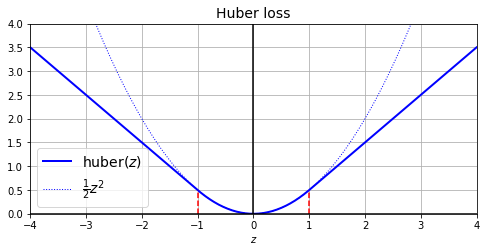

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [28]:
from tensorflow import keras
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])


model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.9929 - mae: 1.4047 - val_loss: 0.2457 - val_mae: 0.5379
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2081 - mae: 0.5022 - val_loss: 0.1980 - val_mae: 0.4828


### 사용자 정의 요소를 가진 모델을 저장하고 로드하기

In [29]:
model.save("my_model_with_a_custom_loss.h5")

In [30]:
model = keras.models.load_model("my_model_with_a_custom_loss.h5",
                                custom_objects={"huber_fn": huber_fn})
# 로드할때는 함수 이름과 실제함수를 매핑한 딕셔너리를 전달해야 한다.

In [31]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1987 - mae: 0.4897 - val_loss: 0.1958 - val_mae: 0.4826
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.1957 - mae: 0.4849 - val_loss: 0.1959 - val_mae: 0.4801


In [32]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [33]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2242 - mae: 0.4916 - val_loss: 0.2296 - val_mae: 0.4837
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2147 - mae: 0.4833 - val_loss: 0.2252 - val_mae: 0.4693


In [34]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")

In [35]:
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})
# 모델을 저장할 때 threshold 값은 저장되지 않기 때문에,
# 모델을 로드할 때 threshold 값을 지정해야 한다.

In [36]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2117 - mae: 0.4783 - val_loss: 0.2562 - val_mae: 0.4904
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2095 - mae: 0.4746 - val_loss: 0.2135 - val_mae: 0.4662


In [37]:
class HuberLoss(keras.losses.Loss):
    # 위에서 threshold값이 저장되지 않는 문제는
    # keras.losses.Loss를 상속하고, get_config() 메서드를 구현하여 해결할 수 있다.
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [38]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2057 - mae: 0.4690 - val_loss: 0.2071 - val_mae: 0.4656
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2074 - mae: 0.4683 - val_loss: 0.2426 - val_mae: 0.4791


### 활성화 함수, 초기화, 규제, 제한을 커스터마이징하기

In [39]:
def my_softplus(z): # tf.nn.softplus(z) 값을 반환합니다
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # tf.nn.relu(weights) 값을 반환합니다
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [40]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

model.save("my_model_with_many_custom_parts.h5")

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.4093 - mae: 0.4667 - val_loss: 1.2295 - val_mae: 0.4781
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.4185 - mae: 0.4699 - val_loss: 3.3328 - val_mae: 0.4998


In [41]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

In [42]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}
        # 손실 , 층, 모델 의 경우 call() 메서드를 구현해야 한다.
        # 규제 , 초기화, 제한의 경우 __call__() 메서드를 구현해야 한다.

### 사용자 정의 지표

In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [44]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [45]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 3.4721 - huber_fn: 1.4907
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.5094 - huber_fn: 0.2499


In [46]:
# 스트리밍 지표
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [47]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [48]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [49]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [50]:
precision.reset_states()

In [51]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # 기본 매개변수 처리 (예를 들면, dtype)
        self.threshold = threshold
        self.total = self.add_weight("total", initializer="zeros")
        # 후버 손실의 합
        self.count = self.add_weight("count", initializer="zeros")
        # 지금까지 처리한 샘플 수
    def huber_fn(self, y_true, y_pred): # 대체 방법
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def update_state(self, y_true, y_pred, sample_weight=None):
        # 클래스를 함수처럼 사용할 때 호출
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        # 최종결과를 계산하고 반환한다.
        # 이 지표 클래스를 함수처럼 사용할 시 , update_state() 호출 이후 result() 호출
        return self.total / self.count
    def get_config(self):
      # threshold 변수를 모델과 함께 저장한다.
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [52]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [53]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 1.4770 - huber_metric_1: 1.4770
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2500 - huber_metric_1: 0.2500


### 사용자 정의 층

In [54]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        # 모든 하이퍼파라미터를 매개변수로 받는다. (units, activation)
        # **kwargs 매개변수는 부모 생성자를 호출하면서 전달된다.
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)
        # keras.activations.get() 함수는 함수 객체, 'relu' 와 같은 문자열을 사용해 적절한 활성화 함수로 바꾼다.
    def build(self, batch_input_shape):
        # 가중치마다 add_weight() 메서드를 호출하여 층의 변수를 만든다.
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        
        # 반드시 마지막에서 부모의 build() 메서드를 호출해야한다.
        # 이를 통해 층이 만들어졌음을 케라스가 인식한다.
        super().build(batch_input_shape)

    def call(self, X):
        # 이 층에 필요한 연산을 수행한다.
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        # 이 층의 출력 크기를 반환한다.
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

In [55]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [56]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 2.9502 - val_loss: 0.7340
Epoch 2/2
162/162 [==============================] - 0s 896us/step - loss: 0.4834


0.4833710491657257

In [57]:
class AddGaussianNoise(keras.layers.Layer):
    # 훈련과 테스트에서 다르게 동작하는 층
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

### 사용자 정의 모델

In [58]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [59]:
class ResidualRegressor(keras.models.Model):
  #서브클래싱 API
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

### 자동 미분을 사용하여 기울기 계산하기

In [60]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [61]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [62]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

# tf.GradientTape 가 이 변수와 관련된 모든 연산을 자동으로 기록한다.

In [63]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [64]:
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)
# gradient() 메서드가 호출된 후에는 자동으로 테이프가 즉시 지워지기 때문에
# 두번째에서 예외가 발생했다.

RuntimeError: ignored

In [65]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)
del tape
# 매개변수에 persistent = True 를 주어 한번 이상 호출 가능하다.
# 사용이 끝난 후 테이프를 삭제하여 리소스를 해제해야 한다.

In [66]:
print(dz_dw1, dz_dw2)

tf.Tensor(36.0, shape=(), dtype=float32) tf.Tensor(10.0, shape=(), dtype=float32)


In [67]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])
# 기본적으로 테이프는 변수가 포함된 연산만을 기록한다.
# 변수가 아닌 다른 객체에 대한 z의 기울기를 계산하려면 None이 반환된다.

In [68]:
gradients

[None, None]

In [69]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])
# 어떤 텐서라도 감시하여 관련된 모든 연산을 기록하도록 강제할 수 있음.

In [70]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

### 사용자 정의 훈련 반복

In [71]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal",
                       kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [72]:
def random_batch(X, y, batch_size = 32):
  idx = np.random.randint(len(X), size= batch_size)
  return X[idx], y[idx]

In [74]:
def print_status_bar(iteration, total, loss , metrics=None):
  metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
  end = "" if iteration < total else "\n"
  print("\r{}/{} - ".format(iteration, total) + metrics, end=end)

In [75]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

In [76]:
for epoch in range(1, n_epochs + 1):
  # 두개의 반복문을 중첩한다.
  # 하나는 에포크 반복을 위한,
  # 다른 하나는 에포크 안의 배치를 위한 것이다.

    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        # 배치를 랜덤하게 샘플링
        with tf.GradientTape() as tape:
            # 배치 하나를 위한 예측을 만들고 손실을 계산한다.
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        # 테이프를 사용해 훈련 가능한 각 변수에 대한 손실의 기울기를 계산하고,
        # 이를 옵티마이저에 적용하여 경사 하강법을 수행한다.
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5
11610/11610 - mean: 1.7137 - mean_absolute_error: 0.5758
Epoch 2/5
11610/11610 - mean: 0.7159 - mean_absolute_error: 0.5105
Epoch 3/5
11610/11610 - mean: 0.7173 - mean_absolute_error: 0.5217
Epoch 4/5
11610/11610 - mean: 0.7028 - mean_absolute_error: 0.5220
Epoch 5/5
11610/11610 - mean: 0.6960 - mean_absolute_error: 0.5288


## 텐서플로 함수와 그래프

In [77]:
def cube(x):
  return x ** 3

In [78]:
cube(2)

8

In [79]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [80]:
tf_cube = tf.function(cube)
tf_cube
# 파이썬 함수처럼 사용할 수 있고, 동일한 결과를 반환하지만
# 타입이 텐서이다.

In [81]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [82]:
# 데코레이터를 사용하는 것이 일반적이다.
@tf.function
def tf_cube(x):
  return x ** 3

In [83]:
tf_cube.python_function(2)
# python_function 속성으로 원본 파이썬 함수를 참조 할 수 있다.

8

### 오토그래프와 트레이싱

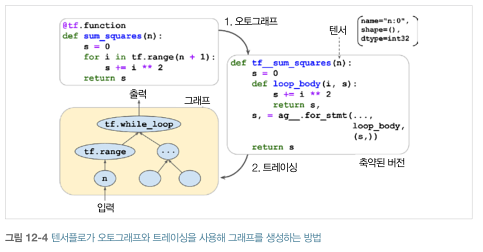